# 4. Evaluation Metrics for classification
In the previous session we trained a model for predicting churn. How do we know if it's good?

## 4.1 Evaluation Metrics: session overview
Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state = 1)
df_train, df_val = train_test_split(df_full_train,test_size = 0.25,random_state=1)

df_train = df_train.reset_index(drop = True)
df_val = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [6]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc,8676-ooqej,1452-voqch,6653-cbbom,5893-kclgt,3992-ywpko,...,3190-fzatl,7734-dboai,0369-zgovk,6937-gcdgq,3589-ppvkw,1309-xgfsn,4819-hjpiw,3703-vavcl,3812-lrzir,1704-nrwye
gender,female,male,female,female,female,male,male,female,female,female,...,male,female,female,male,male,male,male,male,female,female
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
partner,yes,no,no,yes,yes,no,no,no,no,no,...,no,yes,yes,yes,no,yes,no,yes,yes,no
dependents,yes,no,no,yes,no,no,no,no,yes,no,...,yes,yes,yes,yes,no,yes,no,yes,yes,no
tenure,72,10,5,5,18,4,1,1,72,6,...,14,1,28,19,9,52,18,2,27,9
phoneservice,yes,yes,yes,yes,yes,no,yes,yes,yes,yes,...,yes,no,yes,yes,yes,yes,no,yes,yes,yes
multiplelines,yes,yes,yes,no,no,no_phone_service,yes,no,no,yes,...,no,no_phone_service,no,no,no,yes,no_phone_service,no,yes,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no,dsl,fiber_optic,fiber_optic,no,fiber_optic,...,no,dsl,fiber_optic,dsl,dsl,dsl,dsl,fiber_optic,no,fiber_optic
onlinesecurity,yes,no,no,no,no_internet_service,no,no,no,no_internet_service,no,...,no_internet_service,no,no,yes,no,no,no,no,no_internet_service,no


In [7]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [8]:


train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)



In [9]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [10]:


val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]



In [11]:


small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [12]:


val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]



## Accuracy

In [13]:


y_pred = model.predict_proba(X_val)[:, 1]
churn = (y_pred >= 0.5)
(churn == y_val).mean()



np.float64(0.8061538461538461)

## 4.2 Accuracy and dummy model
  * Evaluate  the model on different thresholds
  * Check the accuracy of dummy baseline

In [14]:

len(churn)

4225

In [15]:
(churn == y_val).mean()

np.float64(0.8061538461538461)

In [16]:
3406/4225

0.8061538461538461

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(churn,y_val >= 0.5)

0.8061538461538461

In [19]:
threshold = np.linspace(0,1,21)
scores = []
for t in threshold:
    churn = (y_pred >= t)
    score = (churn == y_val).mean()
    print('%.2f %.3f' %(t,score))
    scores.append(score)


0.00 0.269
0.05 0.511
0.10 0.599
0.15 0.654
0.20 0.694
0.25 0.733
0.30 0.762
0.35 0.777
0.40 0.790
0.45 0.802
0.50 0.806
0.55 0.805
0.60 0.794
0.65 0.781
0.70 0.769
0.75 0.744
0.80 0.733
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


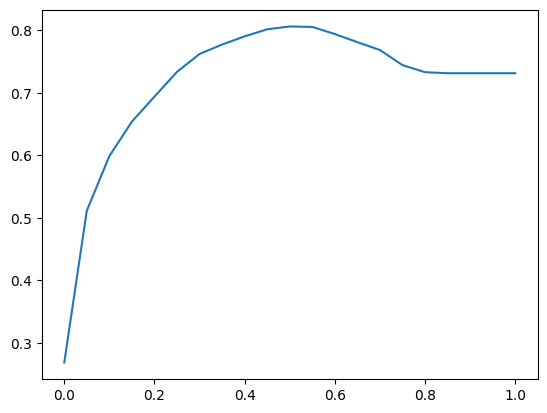

In [20]:
plt.plot(threshold,scores)

In [21]:
from collections import Counter

In [22]:
Counter(churn >= 0.1)

Counter({np.False_: 4225})

In [23]:
1- y_val.mean()

np.float64(0.7313609467455622)

## 4.3 Confution tabel 
 * Different types of errors and correct descisions
 * Arranging them in a table